In [ ]:
# List of packages to be installed
packages <- c("zoo", "mFilter", "forecast", "fpp2", "devtools", "broom", "stargazer", "tidyr", "dynlm", "writexl", "Ecdat", "gdata", "rugarch")

# Install packages if they are not already installed
for(package_name in packages){
  if(!require(package_name, character.only = TRUE)){
    install.packages(package_name)
    library(package_name, character.only = TRUE)
  }
}

Loading required package: zoo

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘zoo’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: mFilter

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘mFilter’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: forecast

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’,

In [ ]:
setwd('/NGC-DL-CONTAINER-LICENSE')

ERROR: ignored

In [ ]:
# Для исполнения кода потребуются библиотеки


library(zoo)
library(mFilter)
library(forecast)
library(fpp2)
library(devtools)
library(broom)
library(stargazer)
library(tidyr)
library(dynlm)
#install.packages("writexl")
library(writexl)
library("Ecdat") 
library("gdata")
library("rugarch")

In [ ]:
# Семинар - 3
# Использовались примеры из книги Носко и Enders

In [ ]:
data = read.csv("quarterly.csv")

In [ ]:
# - 6.2  -
# Лекция 2, слайды 42-49
###############################################################
# Подбор и проверка адекватности моделей

rm(list=ls())
data = read.csv("quarterly.csv")
data$DATE = as.yearqtr(data$DATE, format="%YQ%q")
data$spread = data$r5-data$Tbill

# подробнее о команде можно прочитать здесь
# https://faculty.washington.edu/ezivot/econ589/Introduction_to_the_rugarch_package.pdf

# AR(7)
spec.ar7 = arfimaspec(mean.model=list(armaOrder=c(7,0),include.mean=TRUE))
fit.ar7 = arfimafit(spec=spec.ar7,data=data$spread)
fit.ar7
res.ar7 = fit.ar7@fit$residuals
Box.test(res.ar7,lag=4,type="Ljung-Box")
Box.test(res.ar7,lag=8,type="Ljung-Box")
Box.test(res.ar7,lag=12,type="Ljung-Box")
# Ljung-Box тест указывает на адекватность AR(7) модели


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(7,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.24639    0.124005  10.0512 0.000000
ar1     1.11259    0.068363  16.2747 0.000000
ar2    -0.45026    0.100696  -4.4715 0.000008
ar3     0.39592    0.104228   3.7986 0.000146
ar4    -0.29545    0.105739  -2.7942 0.005203
ar5     0.21739    0.104134   2.0876 0.036833
ar6    -0.29680    0.100529  -2.9524 0.003153
ar7     0.13642    0.068440   1.9933 0.046224
sigma   0.45701    0.022194  20.5913 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.24639    0.093718  13.2994 0.000000
ar1     1.11259    0.065099  17.0907 0.000000
ar2    -0.45026    0.134588  -3.3454 0.000822
ar3     0.39592    0.149644   2.6458 0.008151
ar4    -0.29545    0.156437  -1.8886 0.058941
ar5     0.21739    0.1


	Box-Ljung test

data:  res.ar7
X-squared = 0.18971, df = 4, p-value = 0.9958



	Box-Ljung test

data:  res.ar7
X-squared = 5.586, df = 8, p-value = 0.6935



	Box-Ljung test

data:  res.ar7
X-squared = 13.342, df = 12, p-value = 0.3447


In [ ]:



#ARMA(2,[1,7])
spec.arma27 = arfimaspec(mean.model=list(armaOrder=c(2,7),include.mean=TRUE),
                         fixed.pars=list(ma2=0,ma3=0,ma4=0,ma5=0,ma6=0))
fit.arma27 = arfimafit(spec=spec.arma27,data=data$spread,solver="gosolnp")
fit.arma27
res.arma27 = fit.arma27@fit$residuals
Box.test(res.arma27,lag=4,type="Ljung-Box")
Box.test(res.arma27,lag=8,type="Ljung-Box")
Box.test(res.arma27,lag=12,type="Ljung-Box")

###############################################################


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(2,0,7)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.13382    0.163039   6.9543 0.000000
ar1     0.35278    0.119415   2.9542 0.003135
ar2     0.39321    0.113531   3.4634 0.000533
ma1     0.77861    0.090296   8.6229 0.000000
ma2     0.00000          NA       NA       NA
ma3     0.00000          NA       NA       NA
ma4     0.00000          NA       NA       NA
ma5     0.00000          NA       NA       NA
ma6     0.00000          NA       NA       NA
ma7    -0.13889    0.039820  -3.4879 0.000487
sigma   0.45603    0.022147  20.5913 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.13382    0.154630   7.3324 0.000000
ar1     0.35278    0.155800   2.2643 0.023556
ar2     0.39321    0.152222   2.5831 0.009791
ma1     0.77861    0.1


	Box-Ljung test

data:  res.arma27
X-squared = 0.71727, df = 4, p-value = 0.9492



	Box-Ljung test

data:  res.arma27
X-squared = 2.7719, df = 8, p-value = 0.9478



	Box-Ljung test

data:  res.arma27
X-squared = 11.076, df = 12, p-value = 0.5224


In [ ]:


# - 6.3  -

# определим длину исходного периода 
length(data$DATE) -50

which(data$DATE=="2000 Q2")
data$DATE[162]
actual = data$spread[-c(1:162)]

[1] 162

[1] 162

[1] "2000 Q2"

In [ ]:
### цикл для одношагового предсказания по двум моделям ar7 и arma27
fore.arma27 = fore.ar7 = NULL
for (i in 1:50){
  fit.ar7=arfimafit(spec=spec.ar7,data=data$spread[1:(162+i-1)],solver="gosolnp")
  fore.ar7[i]=arfimaforecast(fit.ar7,n.ahead=1)@forecast$seriesFor
  fit.arma27=arfimafit(spec=spec.arma27,data=data$spread[1:(162+i-1)],solver="gosolnp")
  fore.arma27[i]=arfimaforecast(fit.arma27,n.ahead=1)@forecast$seriesFor
}
mean(fore.ar7)
mean(fore.arma27)
var(fore.ar7)
var(fore.arma27)

[1] 1.24835

[1] 1.229647

[1] 0.6326787

[1] 0.6071579

In [ ]:
# - 6.4  -

### Среднее и дисперсия ошибок прогнозирования
fore.error.ar7 = fore.ar7-actual
fore.error.arma27 = fore.arma27-actual
mean(fore.error.ar7)
mean(fore.error.arma27)
var(fore.error.ar7)
var(fore.error.arma27)
var(actual)

[1] -0.005049623

[1] -0.02375271

[1] 0.1856669

[1] 0.1680193

[1] 0.7811086


Call:
lm(formula = actual ~ fore.ar7)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96282 -0.24039 -0.02416  0.19295  0.99870 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04179    0.11523   0.363    0.718    
fore.ar7     0.97057    0.07808  12.431   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4347 on 48 degrees of freedom
Multiple R-squared:  0.763,	Adjusted R-squared:  0.7581 
F-statistic: 154.5 on 1 and 48 DF,  p-value: < 2.2e-16



Call:
lm(formula = actual ~ fore.arma27)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95419 -0.28529 -0.04023  0.20314  0.97345 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01775    0.11021   0.161    0.873    
fore.arma27  1.00488    0.07593  13.235   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4141 on 48 degrees of freedom
Multiple R-squared:  0.7849,	Adjusted R-squared:  0.7804 
F-statistic: 175.2 on 1 and 48 DF,  p-value: < 2.2e-16


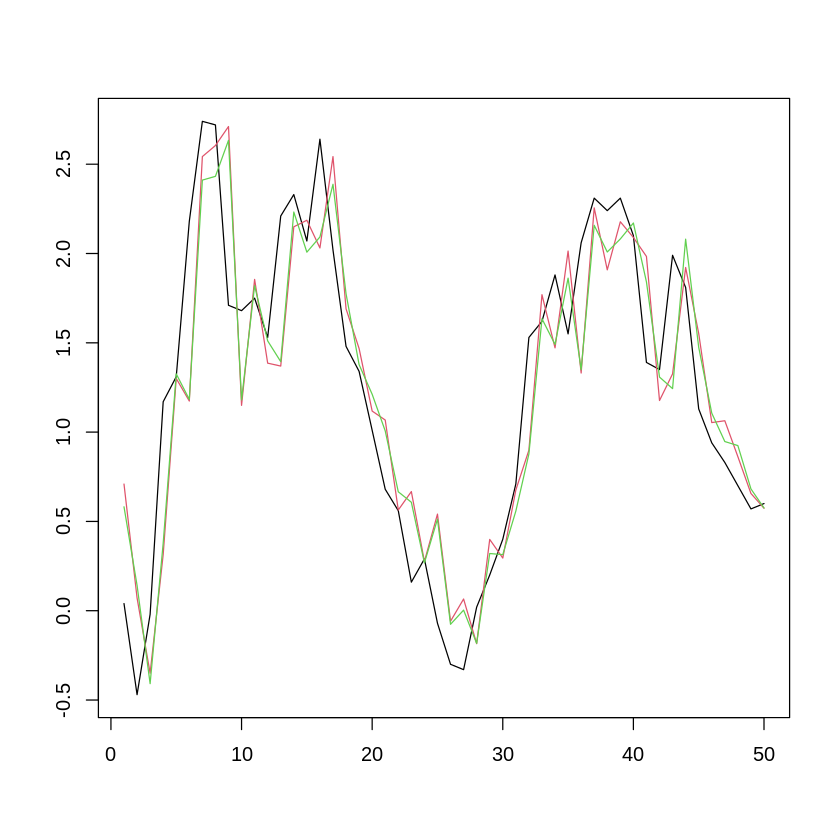

In [ ]:

###############################################################
# Сравнение качества прогнозов
summary(lm(actual~fore.ar7))
summary(lm(actual~fore.arma27))

plot(actual, type="l",xlab="",ylab="")
lines(fore.ar7, col=2)
lines(fore.arma27, col=3)


In [ ]:
# - 6.5  -

### GRANGER-NEWBOLD TEST
x = fore.error.ar7+fore.error.arma27
z = fore.error.ar7-fore.error.arma27
corxz = cor(z,x)
corxz
corxz/( sqrt( (1-corxz^2)/(length(fore.error.ar7)-1)))
# значение 1.70 статистически незначимо для t(49)


[1] 0.2362038

[1] 1.701575


	Diebold-Mariano Test

data:  fore.error.ar7fore.error.arma27
DM = 2.0584, Forecast horizon = 1, Loss function power = 4, p-value =
0.04489
alternative hypothesis: two.sided


[1] 2.037735


Autocorrelations of series ‘d’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.080 -0.212  0.117  0.063  0.258 -0.043 -0.086  0.235 -0.011 -0.018 
    11     12     13     14     15     16 
-0.030  0.085  0.016 -0.012 -0.030  0.051 


	Box-Ljung test

data:  d
X-squared = 3.7516, df = 4, p-value = 0.4407



	Box-Ljung test

data:  d
X-squared = 11.552, df = 8, p-value = 0.1723



	Box-Ljung test

data:  d
X-squared = 12.136, df = 12, p-value = 0.4348


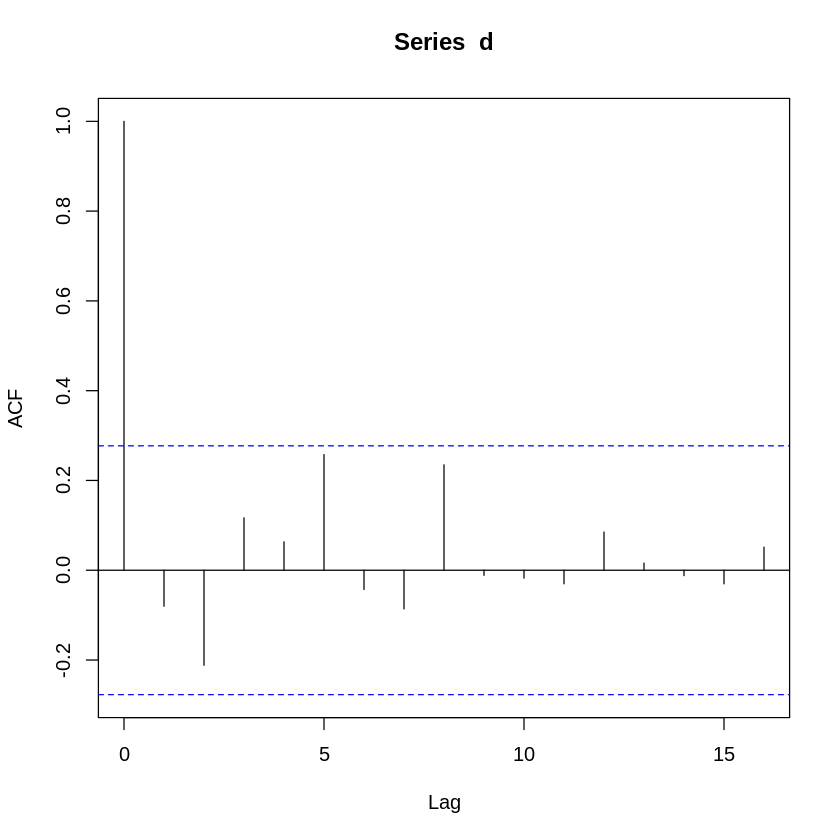

In [ ]:








### DIEBOLD-MARIANO TEST
dm.test(fore.error.ar7,fore.error.arma27, h=1, power=4)

d = (fore.error.ar7)^4-(fore.error.arma27)^4
DM = mean(d)/(var(d)/(length(d)-1))^0.5
DM
# t(49) (двустороннее) критическое значение на 5% = 2.01
#                                           на 1% = 2.68
acf.d = acf(d)
acf.d
Box.test(d,lag=4,type="Ljung-Box")
Box.test(d,lag=8,type="Ljung-Box")
Box.test(d,lag=12,type="Ljung-Box")


In [ ]:


# - 6.6  -
#можно перезагрузить данные
### НЕСТАБИЛЬНОСТЬ ПАРАМЕТРОВ
rm(list=ls())
data = read.csv("quarterly.csv")
data$DATE = as.yearqtr(data$DATE)
data$spread = data$r5-data$Tbill

# определим временные промужетки
which(data$DATE=="1960 Q1")
which(data$DATE=="1981 Q4")
which(data$DATE=="2008 Q1")

[1] 1

[1] 88

[1] 193

In [ ]:



#ARMA(2,[1,7]) 
spec.arma27 = arfimaspec(mean.model=list(armaOrder=c(2,7),include.mean=TRUE),
                         fixed.pars=list(ma2=0,ma3=0,ma4=0,ma5=0,ma6=0))

#оцениваем модель на отрезке 1960 Q3–1981 Q4 (pre) и отрезке 1982 Q1–2008 Q1 (post)
fit.arma27.pre = arfimafit(spec=spec.arma27,data=data$spread[1:88],solver="gosolnp")
fit.arma27.pre
fit.arma27.post = arfimafit(spec=spec.arma27,data=data$spread[89:193],solver="gosolnp")
fit.arma27.post
fit.arma27.all = arfimafit(spec=spec.arma27,data=data$spread[1:193],solver="gosolnp")
fit.arma27.all
SSR1 = sum(fit.arma27.pre@fit$residuals^2)
SSR2 = sum(fit.arma27.post@fit$residuals^2)
SSRunrest = SSR1 +SSR2
SSR = sum(fit.arma27.all@fit$residuals^2)
n=5
T = 193
((SSR - SSRunrest)/n)/((SSRunrest)/(T-2*n))
#F(5,181) критическое значение на 10% = 1.879
#                               на 5% = 2.264




*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(2,0,7)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.00124    0.159521   6.2766 0.000000
ar1     0.33220    0.121477   2.7347 0.006244
ar2     0.32246    0.118192   2.7283 0.006366
ma1     0.95692    0.049881  19.1841 0.000000
ma2     0.00000          NA       NA       NA
ma3     0.00000          NA       NA       NA
ma4     0.00000          NA       NA       NA
ma5     0.00000          NA       NA       NA
ma6     0.00000          NA       NA       NA
ma7    -0.13855    0.060387  -2.2943 0.021773
sigma   0.45289    0.034138  13.2665 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.00124    0.113800   8.7983 0.000000
ar1     0.33220    0.141316   2.3508 0.018735
ar2     0.32246    0.153110   2.1061 0.035196
ma1     0.95692    0.0


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(2,0,7)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.69937    0.194139   8.7534 0.000000
ar1     1.78032    0.123001  14.4741 0.000000
ar2    -0.84949    0.116532  -7.2898 0.000000
ma1    -0.78580    0.125062  -6.2833 0.000000
ma2     0.00000          NA       NA       NA
ma3     0.00000          NA       NA       NA
ma4     0.00000          NA       NA       NA
ma5     0.00000          NA       NA       NA
ma6     0.00000          NA       NA       NA
ma7     0.21046    0.115038   1.8295 0.067331
sigma   0.44954    0.031021  14.4914 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.69937    0.430196   3.9502 0.000078
ar1     1.78032    0.075415  23.6069 0.000000
ar2    -0.84949    0.083277 -10.2009 0.000000
ma1    -0.78580    0.0


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(2,0,7)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.10514    0.171320   6.4507 0.000000
ar1     0.33133    0.124165   2.6684 0.007621
ar2     0.41511    0.118878   3.4919 0.000480
ma1     0.80255    0.092236   8.7011 0.000000
ma2     0.00000          NA       NA       NA
ma3     0.00000          NA       NA       NA
ma4     0.00000          NA       NA       NA
ma5     0.00000          NA       NA       NA
ma6     0.00000          NA       NA       NA
ma7    -0.13211    0.039649  -3.3319 0.000863
sigma   0.46511    0.023673  19.6469 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu      1.10514    0.159479   6.9297 0.000000
ar1     0.33133    0.162277   2.0417 0.041178
ar2     0.41511    0.159083   2.6094 0.009071
ma1     0.80255    0.1

[1] 2.313606

In [ ]:

#Создание дамми
data$Indicator = 0
data$Indicator[which(data$DATE=="1982 Q1"):nrow(data)]=1
data$Indicator

#Тестирование на изменение уровня
spec.arma27.ex = arfimaspec(mean.model=list(armaOrder=c(2,7),include.mean=TRUE,
                                            external.regressors=matrix(data$Indicator)),
                            fixed.pars=list(ma2=0,ma3=0,ma4=0,ma5=0,ma6=0))
fit.arma27.ex = arfimafit(spec=spec.arma27.ex,data=data$spread)
fit.arma27.ex

# p-value = 0.25, т.е. H0: D = 0 не отвергается

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(2,0,7)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu       0.97020    0.178032   5.4496 0.000000
ar1      0.29653    0.116440   2.5466 0.010877
ar2      0.40661    0.107656   3.7769 0.000159
ma1      0.81640    0.083125   9.8213 0.000000
ma2      0.00000          NA       NA       NA
ma3      0.00000          NA       NA       NA
ma4      0.00000          NA       NA       NA
ma5      0.00000          NA       NA       NA
ma6      0.00000          NA       NA       NA
ma7     -0.14513    0.036220  -4.0068 0.000062
mxreg1   0.42251    0.259151   1.6303 0.103029
sigma    0.45357    0.022027  20.5913 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu       0.97020    0.179273   5.4119 0.000000
ar1      0.29653    0.153262   1.9348 0.053019
ar2   

In [ ]:
###############################################################
# - 7 -
###############################################################
### Сдвиг
rm(list=ls())
library("Ecdat")
Break <- read.csv("y_break.csv")
br = Break[,-1]

Warning message in plot.window(...):
“"xax" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"xax" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"xax" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"xax" is not a graphical parameter”
Warning message in box(...):
“"xax" is not a graphical parameter”
Warning message in title(...):
“"xax" is not a graphical parameter”


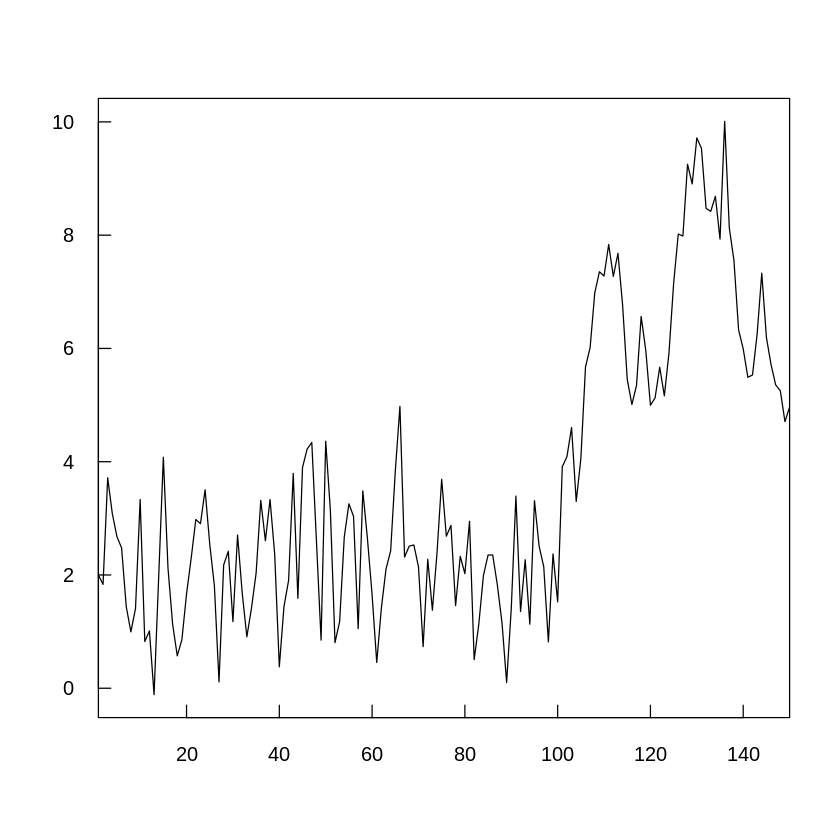

In [ ]:
# - 7.1 -

plot(Break$ENTRY,br,type="l",xax="i",las=1,xaxs="i",tck=0.02,col=1,xlab="",ylab="")

In [ ]:


# - 7.2 -

spec.ar1 = arfimaspec(mean.model=list(armaOrder=c(1,0),include.mean=TRUE))
fit.ar1 = arfimafit(spec.ar1,data=br)
fit.ar1
fit.ar1@fit$coef[1]*(1-fit.ar1@fit$coef[2]) 
# arma(br, order=c(1,0)) # both are correct however one shows the unconditional mean and the other the intercept

Break$Indicator=1
Break$Indicator[1:100]=0
break_y = embed(as.matrix(Break),2)
break_y = break_y[,-c(1,4,6)]

### 
summary(lm(break_y[,1]~break_y[,3]+break_y[,2]))
summary(lm(break_y[,1]~break_y[,3]+break_y[,2]+I(break_y[,3]*break_y[,2])))

arima(br,c(1,0,0))
arima(br[c(1:100)],c(1,0,0))
arima(br[-c(1:100)],c(1,0,0))


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu      3.16364    0.718538   4.4029  1.1e-05
ar1     0.88736    0.040436  21.9449  0.0e+00
sigma   1.14681    0.066211  17.3205  0.0e+00

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu      3.16364    0.569808   5.5521        0
ar1     0.88736    0.045582  19.4673        0
sigma   1.14681    0.067381  17.0197        0

LogLikelihood : -233.3879 

Information Criteria
------------------------------------
                   
Akaike       3.1518
Bayes        3.2121
Shibata      3.1511
Hannan-Quinn 3.1763

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
                        statistic   p-value
Lag[1]                      4.823 0.0280750
Lag[2*(p+q)+(p+q)-1][2]    

mu 
0.3563442


Call:
lm(formula = break_y[, 1] ~ break_y[, 3] + break_y[, 2])

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1787 -0.7761 -0.0261  0.6999  2.9528 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.92541    0.17264   5.360 3.17e-07 ***
break_y[, 3]  0.56828    0.06379   8.909 1.89e-15 ***
break_y[, 2]  1.93626    0.32904   5.885 2.62e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.04 on 146 degrees of freedom
Multiple R-squared:  0.8214,	Adjusted R-squared:  0.8189 
F-statistic: 335.7 on 2 and 146 DF,  p-value: < 2.2e-16



Call:
lm(formula = break_y[, 1] ~ break_y[, 3] + break_y[, 2] + I(break_y[, 
    3] * break_y[, 2]))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.97232 -0.66699  0.03538  0.54710  2.54346 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     1.60151    0.22187   7.218 2.73e-11 ***
break_y[, 3]                    0.25449    0.09232   2.757  0.00659 ** 
break_y[, 2]                   -0.22442    0.57377  -0.391  0.69628    
I(break_y[, 3] * break_y[, 2])  0.54327    0.12148   4.472 1.55e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9778 on 145 degrees of freedom
Multiple R-squared:  0.843,	Adjusted R-squared:  0.8398 
F-statistic: 259.6 on 3 and 145 DF,  p-value: < 2.2e-16



Call:
arima(x = br, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.8791     3.6003
s.e.  0.0375     0.7366

sigma^2 estimated as 1.306:  log likelihood = -233.58,  aic = 473.16


Call:
arima(x = br[c(1:100)], order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.2520     2.1458
s.e.  0.0963     0.1367

sigma^2 estimated as 1.053:  log likelihood = -144.51,  aic = 295.02


Call:
arima(x = br[-c(1:100)], order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.8776     6.0700
s.e.  0.0668     0.8549

sigma^2 estimated as 0.655:  log likelihood = -61.1,  aic = 128.21

In [ ]:
# - 7.3 -
# AR1
# CUMSUM слайд 59
forecasts = NULL
for (i in 1:(length(br)-2)){
  model = arima(br[1:(2+i-1)],c(1,0,0))
  forecasts[i] = forecast(model,h=1)$mean # Gives the one-step forecast
}
res = br[-c(1:2)]-forecasts

null device 
          1

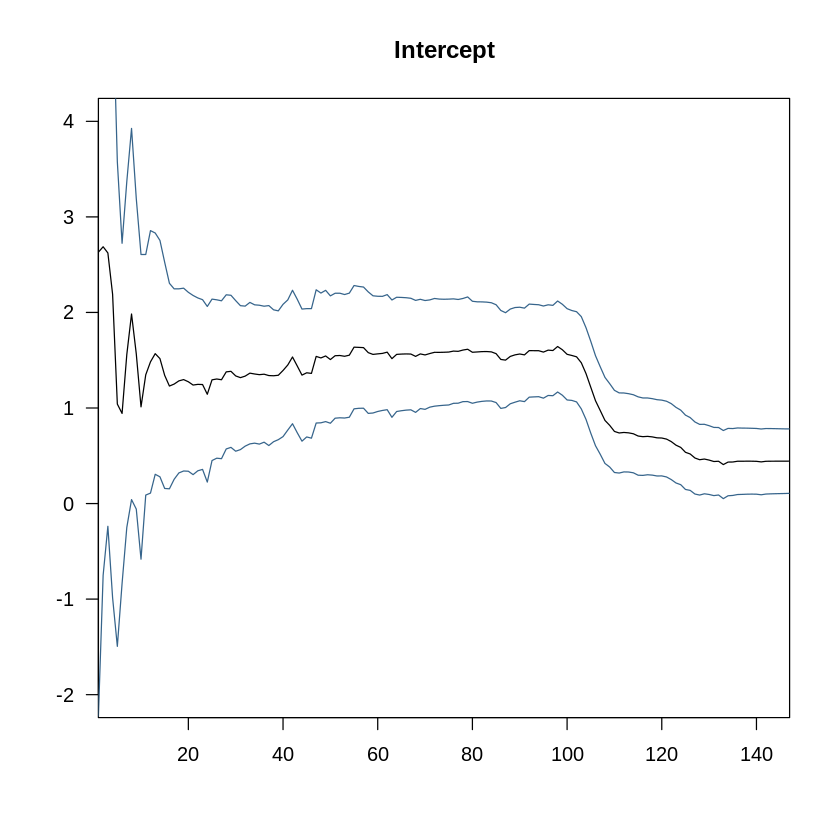

In [ ]:




# 
# INTERCEPT PLOT 
slope.est=intercept.est=slope.sigma.est=int.sigma.est=NULL
for (i in 1:(length(br)-3)){
  y.br = embed(br[1:(3+i)],2)
  model=lm(y.br[,1]~y.br[,-1])
  intercept.est[i]=coef(model)[1]
  slope.est[i]=coef(model)[2]
  int.sigma.est[i]=summary(model)$coefficients[1,2]
  slope.sigma.est[i]=summary(model)$coefficients[2,2]
}

int.upper.band=intercept.est+2*int.sigma.est
int.lower.band=intercept.est-2*int.sigma.est
slope.upper.band=slope.est+2*slope.sigma.est
slope.lower.band=slope.est-2*slope.sigma.est


plot(intercept.est, type="l",xlab="",ylab="",ylim=c(-2,4),xaxs="i",las=1,main="Intercept")
lines(int.upper.band, col="steelblue4")
lines(int.lower.band, col="steelblue4")

dev.off()
plot(slope.est, type="l",xlab="",ylab="",ylim=c(-2,2),xaxs="i",las=1,tck=.02,main="Autoregressive Parameter")
lines(slope.upper.band, col="steelblue4")
lines(slope.lower.band, col="steelblue4")
abline(h=0,lty=2)

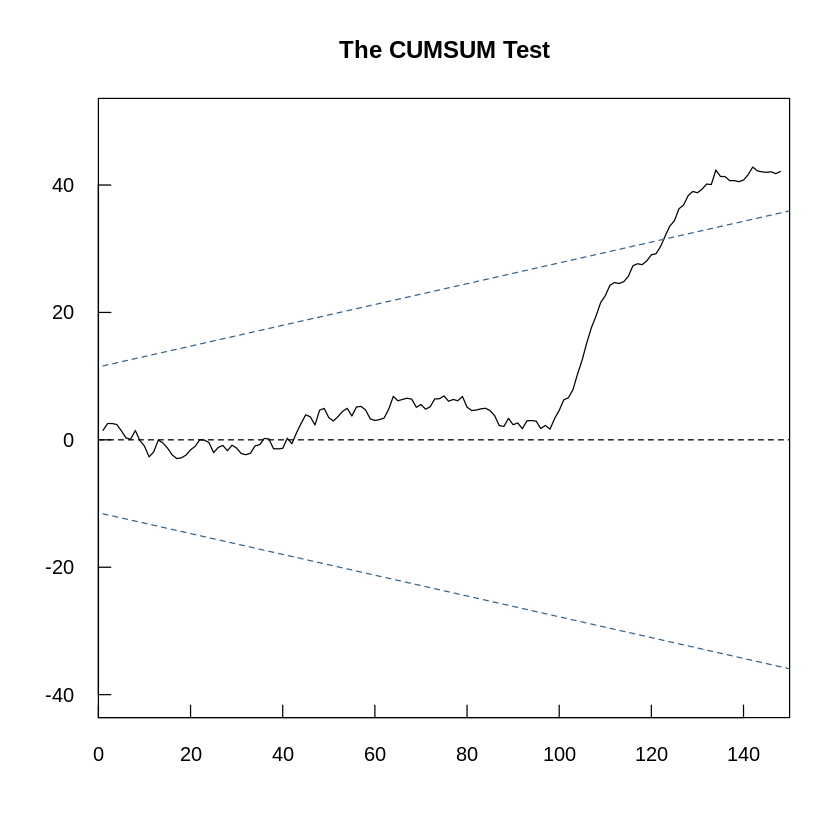

In [ ]:


# - 7.4 -
# слайд 60

CUMSUM=NULL
for (i in 1:length(br)){
  CUMSUM=c(CUMSUM,sum(res[1:i])/sd(res))
}

lower=upper=NULL
for (i in 1:length(br)){
  upper[i]= 0.948*(length(br)^0.5)+2*(i-1)*(length(br)^-0.5)
  lower[i]=-0.948*(length(br)^0.5)-2*(i-1)*(length(br)^-0.5)
}

plot(CUMSUM, type="l", xlim=c(0,150),ylim=c(-40,50),las=1,xaxs="i",xlab="",ylab="",tck=0.02,main="The CUMSUM Test")
lines(upper, col="steelblue4",lty=2)
lines(lower, col="steelblue4",lty=2)
abline(h=0,lty=2)

